In [23]:
import matplotlib.pyplot as plt
# import numpy as np
import os
import pandas as pd

In [3]:
data = pd.read_csv(os.getcwd() + '/Data/NEU_Matches.csv')
print(data.shape)
data.head()

(36, 7)


,bp_id,ls_id,name_ls,name_bp,Match,Repeated_bp,URL
0,112459,1188,Charles K Gifford,CHARLES GIFFORD,Trustee,Yes,NaN
1,295562,1483,Ronald L Sargent,RONALD L SARGENT,Trustee,NaN,NaN
2,252548,2898,Sy Sternberg,SY STERNBERG,Board of Directors,NaN,NaN
3,946922,3709,Joseph M Tucci,JOSEPH TUCCI,Board of Directors,NaN,NaN
4,946900,4154,Carole J Uhrich Shapazian,CAROLE SHAPAZIAN,Trustee,NaN,NaN


In [7]:
data['Match'] = data['Match'].apply(lambda x: 'No match' if x == 'X' else x)
data['Match'].value_counts()

Trustee               13
No match               9
Trustee, Alumni        7
Board of Directors     4
CPS Faculty            1
General Counsel        1
President              1
Name: Match, dtype: int64

In [27]:
data['Repeated_bp'] = data['Repeated_bp'].apply(lambda x: 'No' if pd.isna(x) else x)
data['Repeated_bp'].value_counts()

No     28
Yes     8
Name: Repeated_bp, dtype: int64

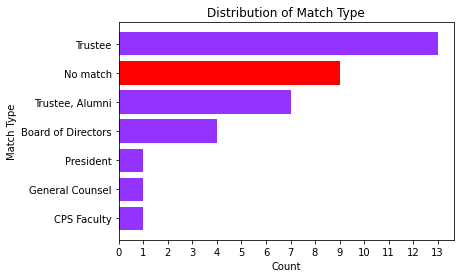

In [19]:
match_counts = data['Match'].value_counts().sort_values(ascending = True)

plt.barh(match_counts.index, match_counts, color = ['#9433ff', '#9433ff', '#9433ff', '#9433ff', '#9433ff', '#ff0000', '#9433ff'])
plt.title('Distribution of Match Type')
plt.xlabel('Count')
plt.ylabel('Match Type')
plt.xticks(range(0, match_counts.max() + 1))
plt.show()
plt.close()

In [29]:
xyz = data[(data['Repeated_bp'] == 'Yes') | (data['Match'] == 'No match')]
xyz

,bp_id,ls_id,name_ls,name_bp,Match,Repeated_bp,URL
0,112459,1188,Charles K Gifford,CHARLES GIFFORD,Trustee,Yes,NaN
7,178721,9196,M William Howard Jr,WILLIAM HOWARD,No match,Yes,NaN
8,178721,9725,William Howard Powell,WILLIAM HOWARD,No match,Yes,NaN
10,178721,12074,William G Howard Jr,WILLIAM HOWARD,No match,Yes,NaN
16,182465,320523,Ian Peter Cameron,PETER CAMERON,No match,No,NaN
18,112459,68713,Charles H Gifford,CHARLES GIFFORD,No match,Yes,NaN
19,178721,331170,William Howard Morris,WILLIAM HOWARD,No match,Yes,NaN
20,178721,333394,William H. Howard,WILLIAM HOWARD,No match,Yes,NaN
23,178721,78762,William Howard Taft,WILLIAM HOWARD,No match,Yes,NaN
34,205233,162652,William R Cotter,WILLIAM COTTER,No match,No,NaN


In [39]:
xyz.groupby(['Repeated_bp', 'Match']).size()

Repeated_bp  Match   
No           No match    2
Yes          No match    7
             Trustee     1
dtype: int64